In [1]:
pip install networkx==2.3

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import unittest

In [3]:
def merge_two_dicts(dict, dict2, dict2_name):
    for key, value in dict2.items():
        if dict.get(key) is None:
            dict[key] = {}
        dict[key][dict2_name] = value
    return dict

def merge_dicts(dicts):
    init_dict = {}
    for key, value in dicts.items():
        init_dict = merge_two_dicts(init_dict, value, key)
    return init_dict

In [4]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

def draw(G):
    types = nx.get_node_attributes(G, 'type')
    xs = nx.get_node_attributes(G, 'x')
    ys = nx.get_node_attributes(G, 'y')
    zs = nx.get_node_attributes(G, 'z')
    bs = nx.get_node_attributes(G, 'b')
    ls = nx.get_node_attributes(G, 'l')
    rs = nx.get_node_attributes(G, 'r')


    labels = merge_dicts({
        "x": xs,
        "y": ys,
        "z": zs,
        "b": bs,
        "l": ls,
        "r": rs,
        "t": types
    })

    labels_traversed = {}

    for key, value in labels.items():
        label = ""
        for ikey, value in value.items():
            label += ikey + "=" + str(value) + " "
        labels_traversed[key] = label

    nx.draw(G, labels=labels_traversed)

In [5]:
def applicable_ex_1(G):
    r1 = G.nodes['i1']['r']
    b1 = G.nodes['e1']['b']
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    
    return r1 and b1 and l1 >= l2 and l1 >= l3

In [6]:
def transform_ex_1(G):
    l4 = G.nodes['e1']['l'] / 2
    b4 = G.nodes['e1']['b']
    l5 = G.nodes['e1']['l'] / 2
    b5 = G.nodes['e1']['b']
    x4 = (G.nodes['v1']['x'] + G.nodes['v2']['x']) / 2
    y4 = (G.nodes['v1']['y'] + G.nodes['v2']['y']) / 2
    z4 = (G.nodes['v1']['z'] + G.nodes['v2']['z']) / 2
    x3 = G.nodes['v3']['x']
    y3 = G.nodes['v3']['y']
    z3 = G.nodes['v3']['z']
    l6 = math.sqrt(math.pow(x3 - x4, 2) + math.pow(y3 - y4, 2) + math.pow(z3 - z4, 2))
    b6 = False
    r2 = False
    r3 = False
    
    G.remove_edge('v1', 'e1')
    G.remove_edge('v2', 'e1')
    G.remove_node('e1')
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')

    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('e5', type='e', b=b5, l=l5)
    G.add_node('e6', type='e', b=b6, l=l6)

    G.add_node('v4', type='v', x=x4, y=y4, z=z4)
    
    G.add_edge('v3', 'e6')
    G.add_edge('v4', 'e6')
    
    G.add_edge('v1', 'e4')
    G.add_edge('v1', 'i2')
    G.add_edge('v3', 'i2')
    G.add_edge('v4', 'i2')
    G.add_edge('v4', 'e4')
    
    G.add_edge('v2', 'e5')
    G.add_edge('v2', 'i3')
    G.add_edge('v3', 'i3')
    G.add_edge('v4', 'i3')
    G.add_edge('v4', 'e5')
    
    
    return G;

In [8]:
def graph_ex_1(x1, x2, x3, y1, y2, y3, z1, z2, z3, r1, b1, b2, b3, l1, l2, l3):
    G=nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v2', type='v', x=x2, y=y2, z=z2)
    G.add_node('v3', type='v', x=x3, y=y3, z=z3)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('i1', type='i', r=r1)

    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v2')
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v3')
    G.add_edge('e3', 'v1')
    G.add_edge('e3', 'v3')
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v2')
    G.add_edge('i1', 'v3')
    
    return G

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


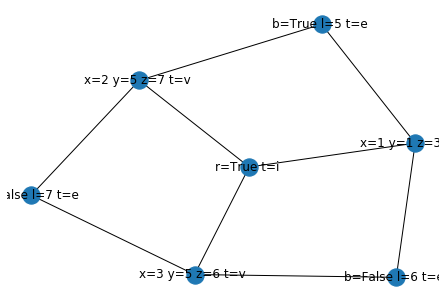

In [9]:
G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=True, b2=False, b3=False, l1=5, l2=7, l3=6)
draw(G)

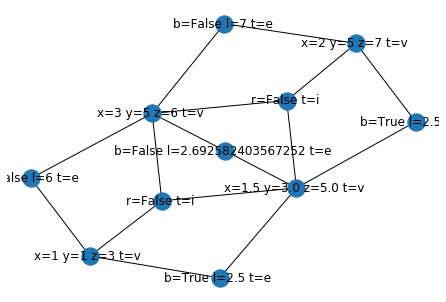

In [10]:
draw(transform_ex_1(G))

In [35]:
class TestEx1(unittest.TestCase):
    def test_applicable_fail_1(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=True, b2=False, b3=False, l1=7, l2=7, l3=8)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_2(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=True, b2=False, b3=False, l1=7, l2=8, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_3(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=True, b2=False, b3=False, l1=7, l2=8, l3=8)
        self.assertFalse(applicable_ex_1(G))

    def test_applicable_fail_4(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=False, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_5(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=False, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_6(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=False, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_7(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=False, b1=True, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_8(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=False, b1=True, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_9(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=False, b1=True, b2=False, b3=False, l1=7, l2=7, l3=8)
        self.assertFalse(applicable_ex_1(G))

    def test_applicable_fail_10(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=False, b1=True, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_11(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=False, b1=True, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G))
        
    def test_applicable_fail_12(self):
        G = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=False, b1=True, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertFalse(applicable_ex_1(G)) 
    
        
        
    def test_applicable_pass_1(self):
        G = graph_ex_1(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=True, b2=False, b3=False, l1=7, l2=7, l3=7)
        self.assertTrue(applicable_ex_1(G))
    
    def test_applicable_pass_2(self):
        G = graph_ex_1(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=True, b2=False, b3=False, l1=8, l2=7, l3=7)
        self.assertTrue(applicable_ex_1(G))
 
    def test_applicable_pass_3(self):
        G = graph_ex_1(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=True, b2=False, b3=False, l1=8, l2=7, l3=8)
        self.assertTrue(applicable_ex_1(G))
        
    def test_calculations(self):
        G_origin = graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=True, b2=False, b3=False, l1=10, l2=7, l3=6)
        G =        graph_ex_1(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=True, b2=False, b3=False, l1=10, l2=7, l3=6)
        G = transform_ex_1(G)
        self.assertEqual(G_origin.nodes['e1']['l'] / 2, G.nodes['e4']['l'])
        self.assertEqual(G_origin.nodes['e1']['b'], G.nodes['e4']['b'])
        self.assertEqual(G_origin.nodes['e1']['l'] / 2, G.nodes['e5']['l'])
        self.assertEqual(G_origin.nodes['e1']['b'], G.nodes['e5']['b'])
        self.assertEqual((G.nodes['v1']['x'] + G.nodes['v2']['x']) / 2, G.nodes['v4']['x'])
        self.assertEqual((G.nodes['v1']['y'] + G.nodes['v2']['y']) / 2, G.nodes['v4']['y'])
        self.assertEqual((G.nodes['v1']['z'] + G.nodes['v2']['z']) / 2, G.nodes['v4']['z'])
        self.assertEqual(math.sqrt(math.pow(G.nodes['v3']['x'] - G.nodes['v4']['x'], 2) + math.pow(G.nodes['v3']['y'] - G.nodes['v4']['y'], 2) + math.pow(G.nodes['v3']['z'] - G.nodes['v4']['z'], 2)), G.nodes['e6']['l'])
        self.assertFalse(G.nodes['i2']['r'])
        self.assertFalse(G.nodes['i3']['r'])
        self.assertFalse(G.nodes['e6']['b'])
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_applicable_fail_1 (__main__.TestEx1) ... ok
test_applicable_fail_10 (__main__.TestEx1) ... ok
test_applicable_fail_11 (__main__.TestEx1) ... ok
test_applicable_fail_12 (__main__.TestEx1) ... ok
test_applicable_fail_2 (__main__.TestEx1) ... ok
test_applicable_fail_3 (__main__.TestEx1) ... ok
test_applicable_fail_4 (__main__.TestEx1) ... ok
test_applicable_fail_5 (__main__.TestEx1) ... ok
test_applicable_fail_6 (__main__.TestEx1) ... ok
test_applicable_fail_7 (__main__.TestEx1) ... ok
test_applicable_fail_8 (__main__.TestEx1) ... ok
test_applicable_fail_9 (__main__.TestEx1) ... ok
test_applicable_pass_1 (__main__.TestEx1) ... ok
test_applicable_pass_2 (__main__.TestEx1) ... ok
test_applicable_pass_3 (__main__.TestEx1) ... ok
test_calculations (__main__.TestEx1) ... ok
test_applicable_fail_1 (__main__.TestEx3) ... ok
test_applicable_fail_2 (__main__.TestEx3) ... ok
test_applicable_fail_3 (__main__.TestEx3) ... ok
test_applicable_fail_4 (__main__.TestEx3) ... ok
test_applicable_fail_5

In [36]:
def applicable_ex_3(G):
    r1 = G.nodes['i1']['r']
    b1 = G.nodes['e1']['b']
    b2 = G.nodes['e2']['b']
    b3 = G.nodes['e3']['b']
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    
    return r1 and not b1 and l1 >= l2 and l1 >= l3 and not ((b2 and l2 == l1) or (b3 and l3 == l1))

In [37]:
def transform_ex_3(G):
    l4 = G.nodes['e1']['l'] / 2
    b4 = G.nodes['e1']['b']
    l5 = G.nodes['e1']['l'] / 2
    b5 = G.nodes['e1']['b']
    x4 = (G.nodes['v1']['x'] + G.nodes['v2']['x']) / 2
    y4 = (G.nodes['v1']['y'] + G.nodes['v2']['y']) / 2
    z4 = (G.nodes['v1']['z'] + G.nodes['v2']['z']) / 2
    x3 = G.nodes['v3']['x']
    y3 = G.nodes['v3']['y']
    z3 = G.nodes['v3']['z']
    l6 = math.sqrt(math.pow(x3 - x4, 2) + math.pow(y3 - y4, 2) + math.pow(z3 - z4, 2))
    b6 = False
    r2 = False
    r3 = False
    
    G.remove_edge('v1', 'e1')
    G.remove_edge('v2', 'e1')
    G.remove_node('e1')
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')

    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('e5', type='e', b=b5, l=l5)
    G.add_node('e6', type='e', b=b6, l=l6)

    G.add_node('v4', type='v', x=x4, y=y4, z=z4)
    
    G.add_edge('v3', 'e6')
    G.add_edge('v4', 'e6')
    
    G.add_edge('v1', 'e4')
    G.add_edge('v1', 'i2')
    G.add_edge('v3', 'i2')
    G.add_edge('v4', 'i2')
    G.add_edge('v4', 'e4')
    
    G.add_edge('v2', 'e5')
    G.add_edge('v2', 'i3')
    G.add_edge('v3', 'i3')
    G.add_edge('v4', 'i3')
    G.add_edge('v4', 'e5')
    
    
    return G;

In [38]:
def graph_ex_3(x1, x2, x3, y1, y2, y3, z1, z2, z3, r1, b1, b2, b3, l1, l2, l3):
    G=nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v2', type='v', x=x2, y=y2, z=z2)
    G.add_node('v3', type='v', x=x3, y=y3, z=z3)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('i1', type='i', r=r1)

    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v2')
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v3')
    G.add_edge('e3', 'v1')
    G.add_edge('e3', 'v3')
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v2')
    G.add_edge('i1', 'v3')
    
    return G

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


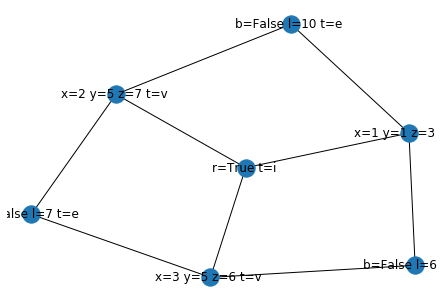

In [39]:
G = graph_ex_3(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=False, b2=False, b3=False, l1=10, l2=7, l3=6)
draw(G)

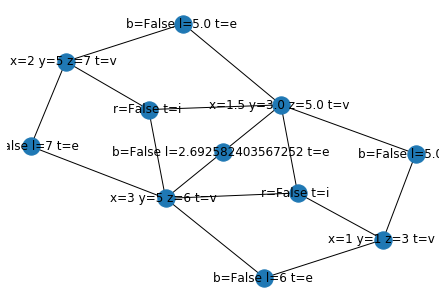

In [40]:
draw(transform_ex_3(G))

In [41]:
class TestEx3(unittest.TestCase):
    def test_applicable_fail_1(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=False, b1=False, b2=False, b3=False, l1=1, l2=1, l3=1)
        self.assertFalse(applicable_ex_3(G))
        
    def test_applicable_fail_2(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=True, b2=False, b3=False, l1=1, l2=1, l3=1)
        self.assertFalse(applicable_ex_3(G))
        
    def test_applicable_fail_3(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=False, l1=1, l2=2, l3=1)
        self.assertFalse(applicable_ex_3(G))
        
    def test_applicable_fail_4(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=False, l1=3, l2=2, l3=5)
        self.assertFalse(applicable_ex_3(G))
        
    def test_applicable_fail_5(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=True, b3=False, l1=7, l2=7, l3=5)
        self.assertFalse(applicable_ex_3(G))
        
    def test_applicable_fail_6(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=True, l1=7, l2=2, l3=7)
        self.assertFalse(applicable_ex_3(G))
        
    def test_applicable_pass_1(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=False, l1=7, l2=7, l3=5)
        self.assertTrue(applicable_ex_3(G))
        
    def test_applicable_pass_2(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=True, b3=False, l1=7, l2=2, l3=5)
        self.assertTrue(applicable_ex_3(G))
        
    def test_applicable_pass_3(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=False, l1=7, l2=2, l3=5)
        self.assertTrue(applicable_ex_3(G))
        
    def test_applicable_pass_4(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=False, l1=7, l2=2, l3=7)
        self.assertTrue(applicable_ex_3(G))
        
    def test_applicable_pass_5(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=True, l1=7, l2=2, l3=5)
        self.assertTrue(applicable_ex_3(G))
        
    def test_applicable_pass_6(self):
        G = graph_ex_3(x1=1, x2=1, x3=1, y1=1, y2=1, y3=1, z1=1, z2=1, z3=1, r1=True, b1=False, b2=False, b3=False, l1=7, l2=2, l3=5)
        self.assertTrue(applicable_ex_3(G))
        
    def test_calculations(self):
        G_origin = graph_ex_3(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=False, b2=False, b3=False, l1=10, l2=7, l3=6)
        G = graph_ex_3(x1=1, x2=2, x3=3, y1=1, y2=5, y3=5, z1=3, z2=7, z3=6, r1=True, b1=False, b2=False, b3=False, l1=10, l2=7, l3=6)
        G = transform_ex_3(G)
        self.assertEqual(G_origin.nodes['e1']['l'] / 2, G.nodes['e4']['l'])
        self.assertEqual(G_origin.nodes['e1']['b'], G.nodes['e4']['b'])
        self.assertEqual(G_origin.nodes['e1']['l'] / 2, G.nodes['e5']['l'])
        self.assertEqual(G_origin.nodes['e1']['b'], G.nodes['e5']['b'])
        self.assertEqual((G.nodes['v1']['x'] + G.nodes['v2']['x']) / 2, G.nodes['v4']['x'])
        self.assertEqual((G.nodes['v1']['y'] + G.nodes['v2']['y']) / 2, G.nodes['v4']['y'])
        self.assertEqual((G.nodes['v1']['z'] + G.nodes['v2']['z']) / 2, G.nodes['v4']['z'])
        self.assertEqual(math.sqrt(math.pow(G.nodes['v3']['x'] - G.nodes['v4']['x'], 2) + math.pow(G.nodes['v3']['y'] - G.nodes['v4']['y'], 2) + math.pow(G.nodes['v3']['z'] - G.nodes['v4']['z'], 2)), G.nodes['e6']['l'])
        self.assertFalse(G.nodes['e6']['b'])
        self.assertFalse(G.nodes['i2']['r'])
        self.assertFalse(G.nodes['i3']['r'])
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_applicable_fail_1 (__main__.TestEx1) ... ok
test_applicable_fail_10 (__main__.TestEx1) ... ok
test_applicable_fail_11 (__main__.TestEx1) ... ok
test_applicable_fail_12 (__main__.TestEx1) ... ok
test_applicable_fail_2 (__main__.TestEx1) ... ok
test_applicable_fail_3 (__main__.TestEx1) ... ok
test_applicable_fail_4 (__main__.TestEx1) ... ok
test_applicable_fail_5 (__main__.TestEx1) ... ok
test_applicable_fail_6 (__main__.TestEx1) ... ok
test_applicable_fail_7 (__main__.TestEx1) ... ok
test_applicable_fail_8 (__main__.TestEx1) ... ok
test_applicable_fail_9 (__main__.TestEx1) ... ok
test_applicable_pass_1 (__main__.TestEx1) ... ok
test_applicable_pass_2 (__main__.TestEx1) ... ok
test_applicable_pass_3 (__main__.TestEx1) ... ok
test_calculations (__main__.TestEx1) ... ok
test_applicable_fail_1 (__main__.TestEx3) ... ok
test_applicable_fail_2 (__main__.TestEx3) ... ok
test_applicable_fail_3 (__main__.TestEx3) ... ok
test_applicable_fail_4 (__main__.TestEx3) ... ok
test_applicable_fail_5

In [42]:
def applicable_ex_5(G):
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    l4 = G.nodes['e4']['l']
    
    return (l1 + l2 >= l3) and (l1 + l2 >= l4)

In [43]:
def transform_ex_5(G):
    r2 = False
    r3 = False
    x2 = G.nodes['v4']['x']
    y2 = G.nodes['v4']['y']
    z2 = G.nodes['v4']['z']
    x4 = G.nodes['v3']['x']
    y4 = G.nodes['v3']['y']
    z4 = G.nodes['v3']['z']
    l5 = math.sqrt(math.pow(x2 - x4, 2) + math.pow(y2 - y4, 2) + math.pow(z2 - z4, 2))
    b5 = False
    
    
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v2')
    G.remove_edge('i1', 'v3')
    G.remove_node('i1')
    
    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    
    G.add_node('e5', type='e', b=b5, l=l5)

    G.add_edge('v1', 'i2')
    G.add_edge('v3', 'i2')
    G.add_edge('v4', 'i2')
    
    G.add_edge('v3', 'e5')
    G.add_edge('v4', 'e5')
    
    G.add_edge('v2', 'i3')
    G.add_edge('v3', 'i3')
    G.add_edge('v4', 'i3')
    
    
    return G;

In [44]:
def graph_ex_5(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, r1, b1, b2, b3, b4, l1, l2, l3, l4):
    G=nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v2', type='v', x=x3, y=y3, z=z3)
    G.add_node('v3', type='v', x=x4, y=y4, z=z4)
    G.add_node('v4', type='v', x=x2, y=y2, z=z2)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('i1', type='i', r=r1)

    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v4')
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v4')
    G.add_edge('e3', 'v2')
    G.add_edge('e3', 'v3')
    G.add_edge('e4', 'v3')
    G.add_edge('e4', 'v1')
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v2')
    G.add_edge('i1', 'v3')
    
    return G

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


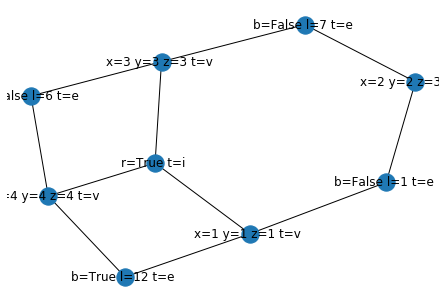

In [45]:
G = graph_ex_5(x1=1, x2=2, x3=3, x4=4, y1=1, y2=2, y3=3, y4=4, z1=1, z2=3, z3=3, z4=4, r1=True, b1=False, b2=False, b3=False, b4=True, l1=1, l2=7, l3=6, l4=12)
draw(G)

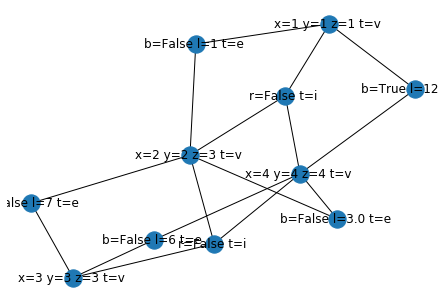

In [46]:
draw(transform_ex_5(G))

In [47]:
class TestEx5(unittest.TestCase):
    def test_applicable_fail_1(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=2, l2=3, l3=1, l4=6)
        self.assertFalse(applicable_ex_5(G))
        
    def test_applicable_fail_2(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=2, l2=3, l3=6, l4=1)
        self.assertFalse(applicable_ex_5(G))
        
    def test_applicable_fail_3(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=2, l2=3, l3=6, l4=6)
        self.assertFalse(applicable_ex_5(G))
        
    def test_applicable_fail_4(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=True, b2=False, b3=False, b4=True, l1=2, l2=3, l3=6, l4=6)
        self.assertFalse(applicable_ex_5(G))
        
    def test_applicable_fail_5(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=True, b2=True, b3=True, b4=True, l1=2, l2=3, l3=6, l4=6)
        self.assertFalse(applicable_ex_5(G))
        
    def test_applicable_pass_1(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=6, l2=1, l3=2, l4=3)
        self.assertTrue(applicable_ex_5(G))
        
    def test_applicable_pass_2(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=1, l2=6, l3=2, l4=3)
        self.assertTrue(applicable_ex_5(G))
        
    def test_applicable_pass_3(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=5, l2=5, l3=2, l4=3)
        self.assertTrue(applicable_ex_5(G))
        
    def test_applicable_pass_4(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=True, b2=True, b3=True, b4=True, l1=5, l2=5, l3=2, l4=3)
        self.assertTrue(applicable_ex_5(G))
        
    def test_applicable_pass_5(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=False, b2=False, b3=False, b4=False, l1=5, l2=5, l3=1, l4=3)
        self.assertTrue(applicable_ex_5(G))
        
    def test_applicable_pass_6(self):
        G = graph_ex_5(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=4, l2=1, l3=5, l4=5)
        self.assertTrue(applicable_ex_5(G))
        
    def test_calculations(self):
        G_origin = graph_ex_5(x1=1, x2=2, x3=3, x4=4, y1=1, y2=4, y3=9, y4=16, z1=2, z2=4, z3=6, z4=8, r1=True, b1=False, b2=False, b3=False, b4=False, l1=10, l2=8, l3=6, l4=7)
        G = graph_ex_5(x1=1, x2=2, x3=3, x4=4, y1=1, y2=4, y3=9, y4=16, z1=2, z2=4, z3=6, z4=8, r1=True, b1=False, b2=False, b3=False, b4=False, l1=10, l2=8, l3=6, l4=7)
        G = transform_ex_5(G)
        self.assertEqual(math.sqrt(math.pow(G.nodes['v4']['x'] - G.nodes['v3']['x'], 2) + math.pow(G.nodes['v4']['y'] - G.nodes['v3']['y'], 2) + math.pow(G.nodes['v4']['z'] - G.nodes['v3']['z'], 2)), G.nodes['e5']['l'])
        self.assertFalse(G.nodes['e5']['b'])
        self.assertFalse(G.nodes['i2']['r'])
        self.assertFalse(G.nodes['i3']['r'])
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_applicable_fail_1 (__main__.TestEx1) ... ok
test_applicable_fail_10 (__main__.TestEx1) ... ok
test_applicable_fail_11 (__main__.TestEx1) ... ok
test_applicable_fail_12 (__main__.TestEx1) ... ok
test_applicable_fail_2 (__main__.TestEx1) ... ok
test_applicable_fail_3 (__main__.TestEx1) ... ok
test_applicable_fail_4 (__main__.TestEx1) ... ok
test_applicable_fail_5 (__main__.TestEx1) ... ok
test_applicable_fail_6 (__main__.TestEx1) ... ok
test_applicable_fail_7 (__main__.TestEx1) ... ok
test_applicable_fail_8 (__main__.TestEx1) ... ok
test_applicable_fail_9 (__main__.TestEx1) ... ok
test_applicable_pass_1 (__main__.TestEx1) ... ok
test_applicable_pass_2 (__main__.TestEx1) ... ok
test_applicable_pass_3 (__main__.TestEx1) ... ok
test_calculations (__main__.TestEx1) ... ok
test_applicable_fail_1 (__main__.TestEx3) ... ok
test_applicable_fail_2 (__main__.TestEx3) ... ok
test_applicable_fail_3 (__main__.TestEx3) ... ok
test_applicable_fail_4 (__main__.TestEx3) ... ok
test_applicable_fail_5

In [7]:
def applicable_ex_7(G):
    b4 = G.nodes['e4']['b']
    l1 = G.nodes['e1']['l']
    l2 = G.nodes['e2']['l']
    l3 = G.nodes['e3']['l']
    l4 = G.nodes['e4']['l']
    
    return b4 and l4 > (l1 + l2) and l4 >= l3

In [8]:
def transform_ex_7(G):
    l5 = G.nodes['e4']['l'] / 2
    b5 = G.nodes['e4']['b']
    l6 = G.nodes['e4']['l'] / 2
    b6 = G.nodes['e4']['b']
    x5 = (G.nodes['v1']['x'] + G.nodes['v4']['x']) / 2
    y5 = (G.nodes['v1']['y'] + G.nodes['v4']['y']) / 2
    z5 = (G.nodes['v1']['z'] + G.nodes['v4']['z']) / 2
    x3 = G.nodes['v3']['x']
    y3 = G.nodes['v3']['y']
    z3 = G.nodes['v3']['z']
    l7 = math.sqrt(math.pow(x3 - x5, 2) + math.pow(y3 - y5, 2) + math.pow(z3 - z5, 2))
    b7 = False
    r2 = False
    r3 = False
    
    G.remove_edge('v1', 'e4')
    G.remove_edge('v4', 'e4')
    G.remove_node('e4')
    G.remove_edge('i1', 'v1')
    G.remove_edge('i1', 'v3')
    G.remove_edge('i1', 'v4')
    G.remove_node('i1')
    
    G.add_node('i2', type='i', r=r2)
    G.add_node('i3', type='i', r=r3)
    
    G.add_node('e5', type='e', b=b5, l=l5)
    G.add_node('e6', type='e', b=b6, l=l6)
    G.add_node('e7', type='e', b=b7, l=l7)
    
    G.add_node('v5', type='v', x=x5, y=y5, z=z5)
    
    G.add_edge('v1', 'i3')
    G.add_edge('v3', 'i3')
    G.add_edge('v5', 'i3')
    G.add_edge('v3', 'e7')
    G.add_edge('v5', 'e7')
    G.add_edge('v1', 'e6')
    G.add_edge('v5', 'e6')
    G.add_edge('v3', 'i2')
    G.add_edge('v4', 'i2')
    G.add_edge('v5', 'i2')
    G.add_edge('v4', 'e5')
    G.add_edge('v5', 'e5')
    
    return G

In [9]:
def graph_ex_7(x1, x2, x3, x4, y1, y2, y3, y4, z1, z2, z3, z4, b1, b2, b3, b4, l1, l2, l3, l4, r1):
    G = nx.Graph()
    G.add_node('v1', type='v', x=x1, y=y1, z=z1)
    G.add_node('v2', type='v', x=x2, y=y2, z=z2)
    G.add_node('v3', type='v', x=x3, y=y3, z=z3)
    G.add_node('v4', type='v', x=x4, y=y4, z=z4)
    G.add_node('e1', type='e', b=b1, l=l1)
    G.add_node('e2', type='e', b=b2, l=l2)
    G.add_node('e3', type='e', b=b3, l=l3)
    G.add_node('e4', type='e', b=b4, l=l4)
    G.add_node('i1', type='i', r=r1)
    
    G.add_edge('e1', 'v1')
    G.add_edge('e1', 'v2')
    G.add_edge('e2', 'v2')
    G.add_edge('e2', 'v3')
    G.add_edge('e3', 'v3')
    G.add_edge('e3', 'v4')
    G.add_edge('e4', 'v4')
    G.add_edge('e4', 'v1')
    G.add_edge('i1', 'v1')
    G.add_edge('i1', 'v3')
    G.add_edge('i1', 'v4')
    
    return G

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


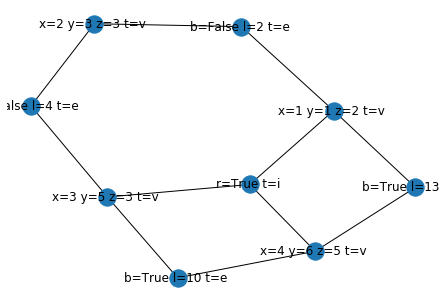

In [10]:
G = graph_ex_7(x1=1, x2=2, x3=3, x4=4, y1=1, y2=3, y3=5, y4=6, z1=2, z2=3, z3=3, z4=5, b1=False, b2=False, b3=True, b4=True, l1=2, l2=4, l3=10, l4=13, r1=True)
draw(G)

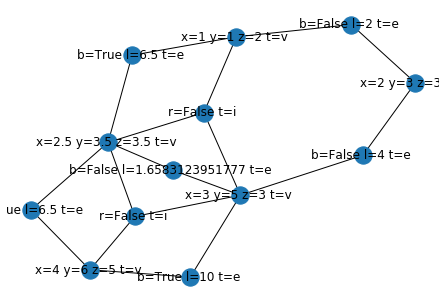

In [11]:
draw(transform_ex_7(G))

In [29]:
class TestEx7(unittest.TestCase):
    def test_applicable_fail_1(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=False, l1=2, l2=3, l3=1, l4=6)
        self.assertFalse(applicable_ex_7(G))
        
    def test_applicable_fail_2(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=2, l2=3, l3=6, l4=1)
        self.assertFalse(applicable_ex_7(G))
        
    def test_applicable_fail_3(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=2, l2=3, l3=6, l4=3)
        self.assertFalse(applicable_ex_7(G))
        
    def test_applicable_fail_4(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=True, b2=False, b3=False, b4=True, l1=2, l2=3, l3=6, l4=5)
        self.assertFalse(applicable_ex_7(G))
        
    def test_applicable_fail_5(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=True, b2=True, b3=True, b4=True, l1=2, l2=3, l3=5, l4=5)
        self.assertFalse(applicable_ex_7(G))
        
    def test_applicable_pass_1(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=6, l2=1, l3=2, l4=10)
        self.assertTrue(applicable_ex_7(G))
        
    def test_applicable_pass_2(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=1, l2=5, l3=2, l4=7)
        self.assertTrue(applicable_ex_7(G))
        
    def test_applicable_pass_3(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=5, l2=5, l3=2, l4=11)
        self.assertTrue(applicable_ex_7(G))
        
    def test_applicable_pass_4(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=True, b2=True, b3=True, b4=True, l1=5, l2=5, l3=2, l4=11)
        self.assertTrue(applicable_ex_7(G))
        
    def test_applicable_pass_5(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=True, b1=False, b2=False, b3=False, b4=True, l1=5, l2=5, l3=1, l4=20)
        self.assertTrue(applicable_ex_7(G))
        
    def test_applicable_pass_6(self):
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=4, l2=1, l3=5, l4=6)
        self.assertTrue(applicable_ex_7(G))
        
    def test_calculations(self):
        G_origin = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=4, l2=1, l3=5, l4=6)
        G = graph_ex_7(x1=1, x2=1, x3=1, x4=1, y1=1, y2=1, y3=1, y4=1, z1=1, z2=1, z3=1, z4=1, r1=False, b1=False, b2=False, b3=False, b4=True, l1=4, l2=1, l3=5, l4=6)
        G = transform_ex_7(G)
        self.assertEqual(math.sqrt(math.pow(G.nodes['v3']['x'] - G.nodes['v5']['x'], 2) + math.pow(G.nodes['v3']['y'] - G.nodes['v5']['y'], 2) + math.pow(G.nodes['v3']['z'] - G.nodes['v5']['z'], 2)), G.nodes['e7']['l'])
        self.assertFalse(G.nodes['e7']['b'])
        self.assertFalse(G.nodes['i2']['r'])
        self.assertFalse(G.nodes['i3']['r'])
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_applicable_fail_1 (__main__.TestEx7) ... ok
test_applicable_fail_2 (__main__.TestEx7) ... ok
test_applicable_fail_3 (__main__.TestEx7) ... ok
test_applicable_fail_4 (__main__.TestEx7) ... ok
test_applicable_fail_5 (__main__.TestEx7) ... ok
test_applicable_pass_1 (__main__.TestEx7) ... ok
test_applicable_pass_2 (__main__.TestEx7) ... ok
test_applicable_pass_3 (__main__.TestEx7) ... ok
test_applicable_pass_4 (__main__.TestEx7) ... ok
test_applicable_pass_5 (__main__.TestEx7) ... ok
test_applicable_pass_6 (__main__.TestEx7) ... ok
test_calculations (__main__.TestEx7) ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.008s

OK
